In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv('solar_generation_selected_features.csv')


In [2]:
# Select your features and target
X = df.drop(['Solar Production (kWh)'], axis=1)  
y = df['Solar Production (kWh)']  # This is the target

# Preprocess the features (scaling)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2


In [3]:
# Initialize the Random Forest Regressor
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
random_forest_model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = random_forest_model.predict(X_val)


In [4]:
# Evaluate the model on the validation set
mse_val = mean_squared_error(y_val, y_val_pred)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val, y_val_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)

# Print validation performance metrics
print(f'Random Forest Validation RMSE: {rmse_val}')
print(f'Random Forest Validation R^2: {r2_val}')
print(f'Random Forest Validation MAE: {mae_val}')

Random Forest Validation RMSE: 0.40987150113984117
Random Forest Validation R^2: 0.9339712993253718
Random Forest Validation MAE: 0.19451870196413318


In [5]:
# Predict on the test data
y_pred = random_forest_model.predict(X_test)

# Evaluate the model on the test set
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print test performance metrics
print(f'Random Forest Test RMSE: {rmse}')
print(f'Random Forest Test R^2: {r2}')
print(f'Random Forest Test MAE: {mae}')


Random Forest Test RMSE: 0.4422458489686863
Random Forest Test R^2: 0.9291903578559455
Random Forest Test MAE: 0.20618131399317405


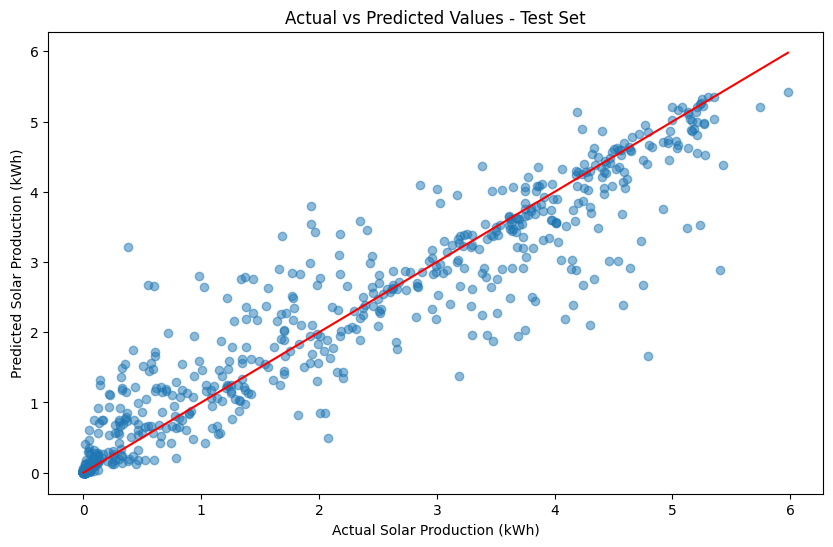

In [6]:
# Actual vs predicted values for random forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Values - Test Set')
plt.xlabel('Actual Solar Production (kWh)')
plt.ylabel('Predicted Solar Production (kWh)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') # Diagonal line
plt.show()

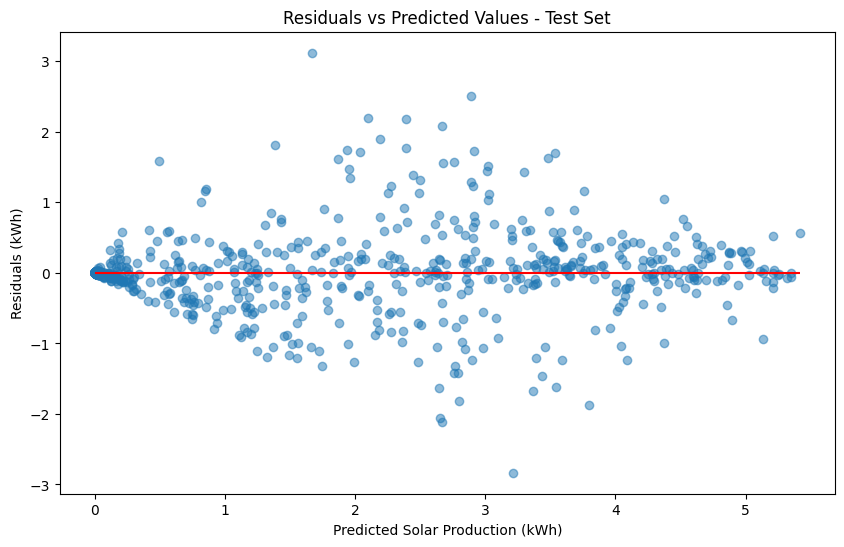

In [7]:
# Residuals plot for random forest
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.title('Residuals vs Predicted Values - Test Set')
plt.xlabel('Predicted Solar Production (kWh)')
plt.ylabel('Residuals (kWh)')
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), color='red')
plt.show()


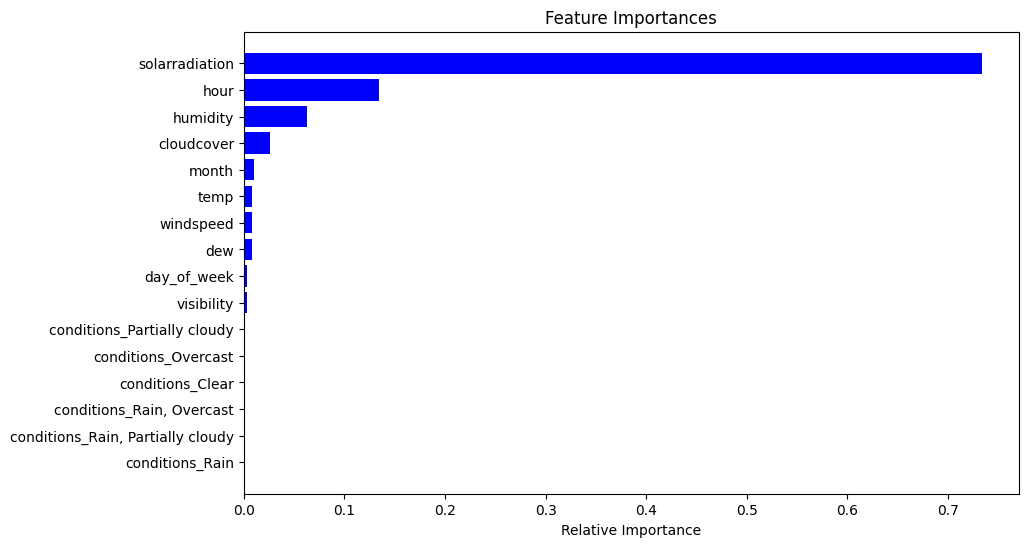

In [8]:
# Features importance plot
importances = random_forest_model.feature_importances_
indices = np.argsort(importances)
features = X.columns

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

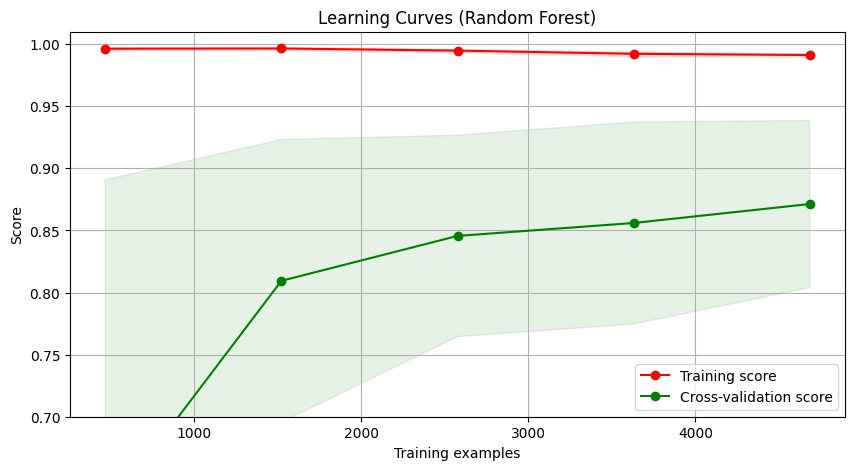

In [9]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(10, 5))  # Adjusted to create a single subplot

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                      train_scores_mean + train_scores_std, alpha=0.1,
                      color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                      test_scores_mean + test_scores_std, alpha=0.1,
                      color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
              label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
              label="Cross-validation score")
    axes.legend(loc="best")

    return plt

# Assuming random_forest_model is your trained model
title = "Learning Curves (Random Forest)"
cv = 5  # Cross-validation splitting strategy

# Plot the learning curve
plot_learning_curve(random_forest_model, title, X_scaled, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
plt.show()


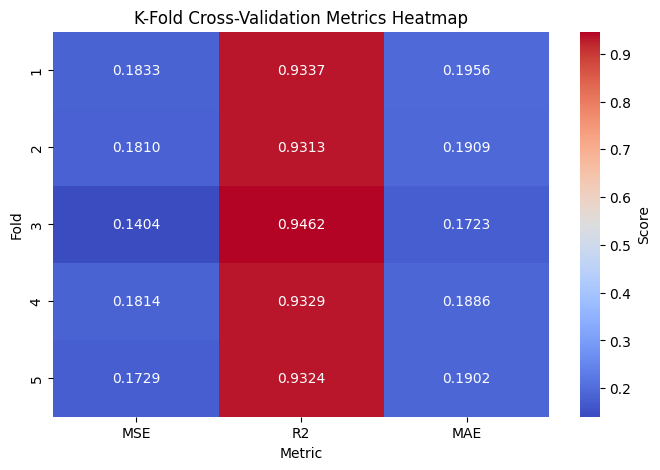

Average MSE: 0.17178982237570203
Average R^2: 0.9353027758038008
Average MAE: 0.18752220008277395


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

# Assuming X_scaled and y have been defined and loaded as per your previous code
# Initialize the Random Forest Regressor
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Setup 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# DataFrame to store the metrics for each fold
results_df = pd.DataFrame(index=range(1, 6), columns=['MSE', 'R2', 'MAE'])

# Perform cross-validation
for fold_idx, (train_index, test_index) in enumerate(kf.split(X_scaled), start=1):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model
    random_forest_model.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = random_forest_model.predict(X_test)
    
    # Calculate metrics
    results_df.loc[fold_idx, 'MSE'] = mean_squared_error(y_test, y_pred)
    results_df.loc[fold_idx, 'R2'] = r2_score(y_test, y_pred)
    results_df.loc[fold_idx, 'MAE'] = mean_absolute_error(y_test, y_pred)

# Convert the DataFrame to float type for the heatmap
results_df = results_df.astype(float)

# Plotting the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(results_df, annot=True, cmap='coolwarm', fmt=".4f", cbar_kws={'label': 'Score'})
plt.title('K-Fold Cross-Validation Metrics Heatmap')
plt.xlabel('Metric')
plt.ylabel('Fold')
plt.show()

# Print average of the metrics
print('Average MSE:', results_df['MSE'].mean())
print('Average R^2:', results_df['R2'].mean())
print('Average MAE:', results_df['MAE'].mean())


In [11]:
#saving the model for real time implementation
import joblib

# Save the trained model to a file
joblib.dump(random_forest_model, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [12]:
from sklearn.preprocessing import MinMaxScaler
import joblib


# Save the scaler to a file
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']